In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

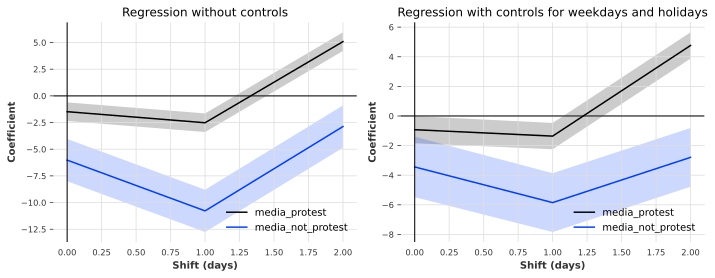

In [2]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
results = regression(include_controls=False)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0])
axes[0].set_title("Regression without controls")

results = regression(lags=0)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[1])
axes[1].set_title("Regression with controls for weekdays and holidays")
fig.tight_layout()
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

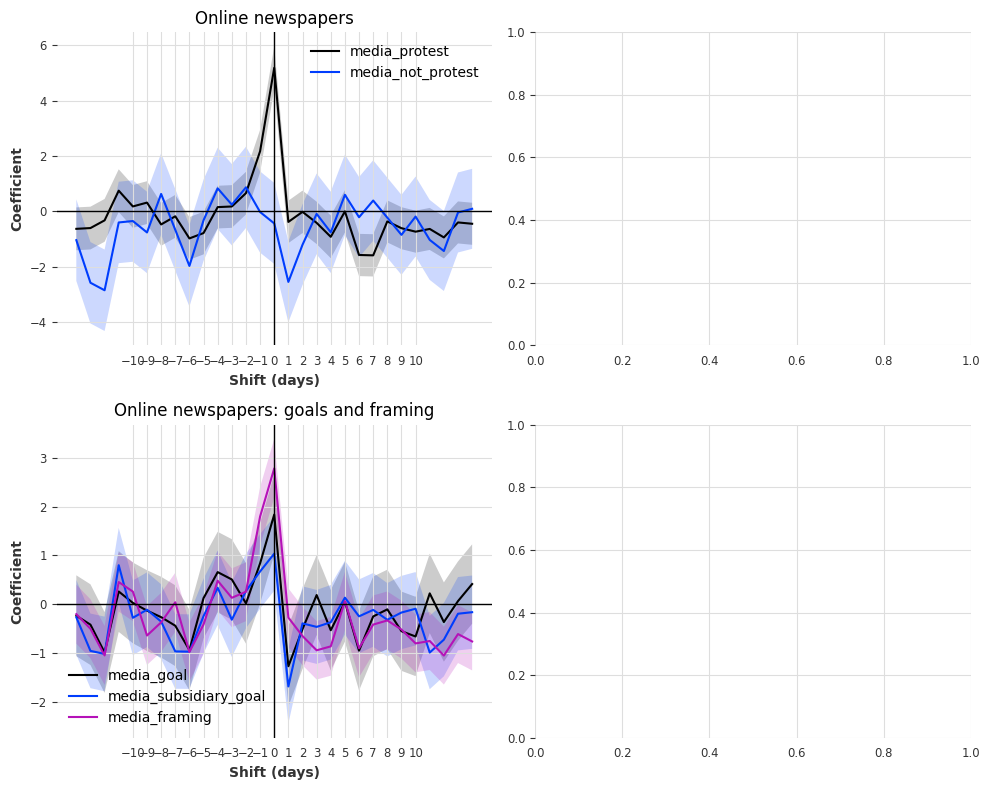

In [2]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

lags = 14
gap = 3

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
results = regression(lags=lags, gap=gap)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0, 0])
axes[0, 0].set_title("Online newspapers")

# results = regression(lags=lags, gap=gap, media_source="dereko")
# plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0, 1])
# axes[0, 1].set_title("Print newspapers")

results = regression(lags=lags, gap=gap)
plot_lagged_impact(results, "occ_FFF", "goals", ax=axes[1, 0])
axes[1, 0].set_title("Online newspapers: goals and framing")

# results = regression(lags=lags, gap=gap, media_source="dereko")
# plot_lagged_impact(results, "occ_FFF", "goals", ax=axes[1, 1])
# axes[1, 1].set_title("Print newspapers: goals and framing")
fig.tight_layout()
plt.show()

In [12]:
results[
    (results["target"] == "media_protest")
    & (results["step"] == 3)
    & (results["lag"] == 3)
].sort_values("coef", key=abs, ascending=False)

,coef,predictor,lag,target,step,ci_lower,ci_upper
5588,-2.778104,is_holiday,3,media_protest,3,-3.149515,-2.406693
5576,0.788376,occ_FFF,3,media_protest,3,0.394382,1.182370
5581,0.715668,occ_EG,3,media_protest,3,-0.533931,1.965267
5580,-0.559241,occ_GP,3,media_protest,3,-1.476726,0.358244
5575,0.354953,occ_ALG,3,media_protest,3,-0.444327,1.154233
5577,0.180200,occ_XR,3,media_protest,3,-0.443454,0.803854
5584,-0.077281,weekday_Sunday,3,media_protest,3,-0.091848,-0.062714
5583,0.053586,weekday_Saturday,3,media_protest,3,0.039047,0.068125
5585,0.028071,weekday_Thursday,3,media_protest,3,0.013422,0.042719
5582,0.024203,weekday_Monday,3,media_protest,3,0.009606,0.038800
